In [1]:
# https://stackoverflow.com/questions/60066481/recognize-single-characters-on-a-page-with-tesseract
# https://stackoverflow.com/questions/61224108/tesseract-ocr-not-recognizing-multiple-characters-in-a-single-image

In [2]:
image_paths = ["../data/sample_images/boggle_1.png",
               "../data/sample_images/boggle_2.jpeg",
               "../data/sample_images/boggle_3.png",
              "../data/sample_images/boggle_4.jpeg"]

In [3]:
# import the necessary packages
from PIL import Image
import pytesseract
import argparse
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
def plot_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
    display(Image.fromarray(img))

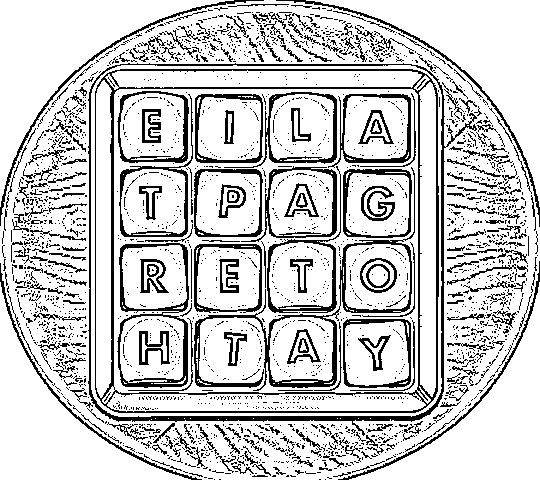

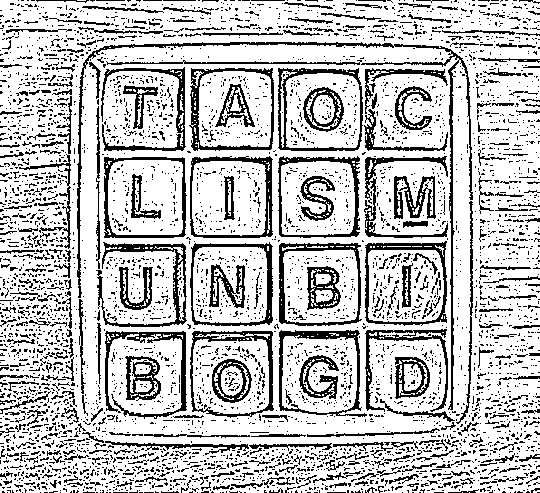

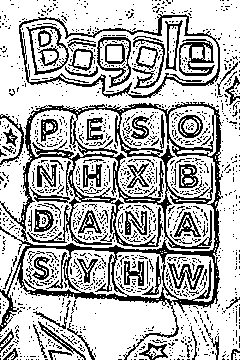

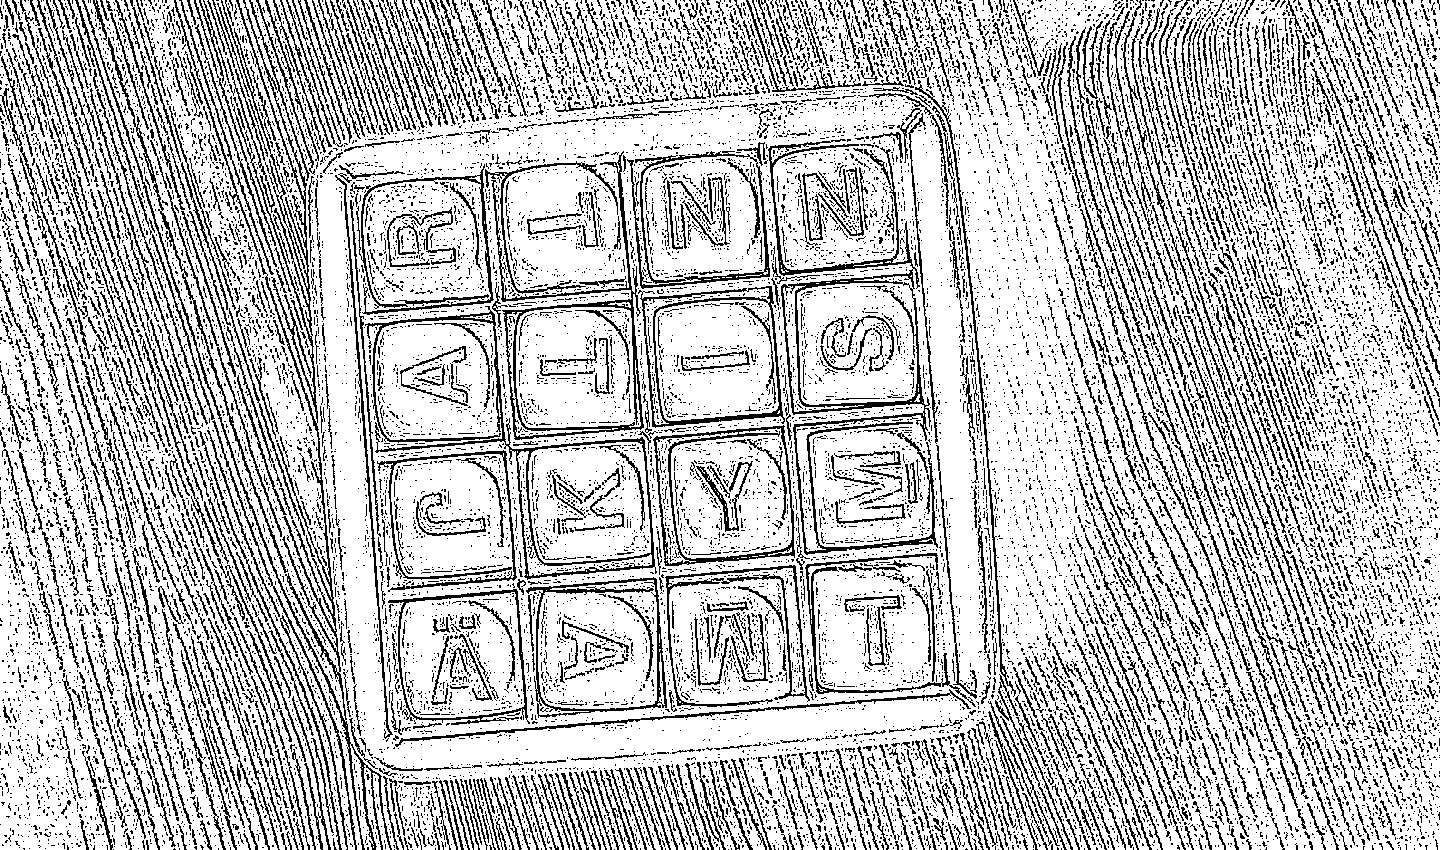

In [22]:
for image_path in image_paths:
    img = cv2.imread(image_path)
    img = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC)
    # turn into gray for next processing
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,5,2)

    plot_image(img)


Number of Contours found = 26


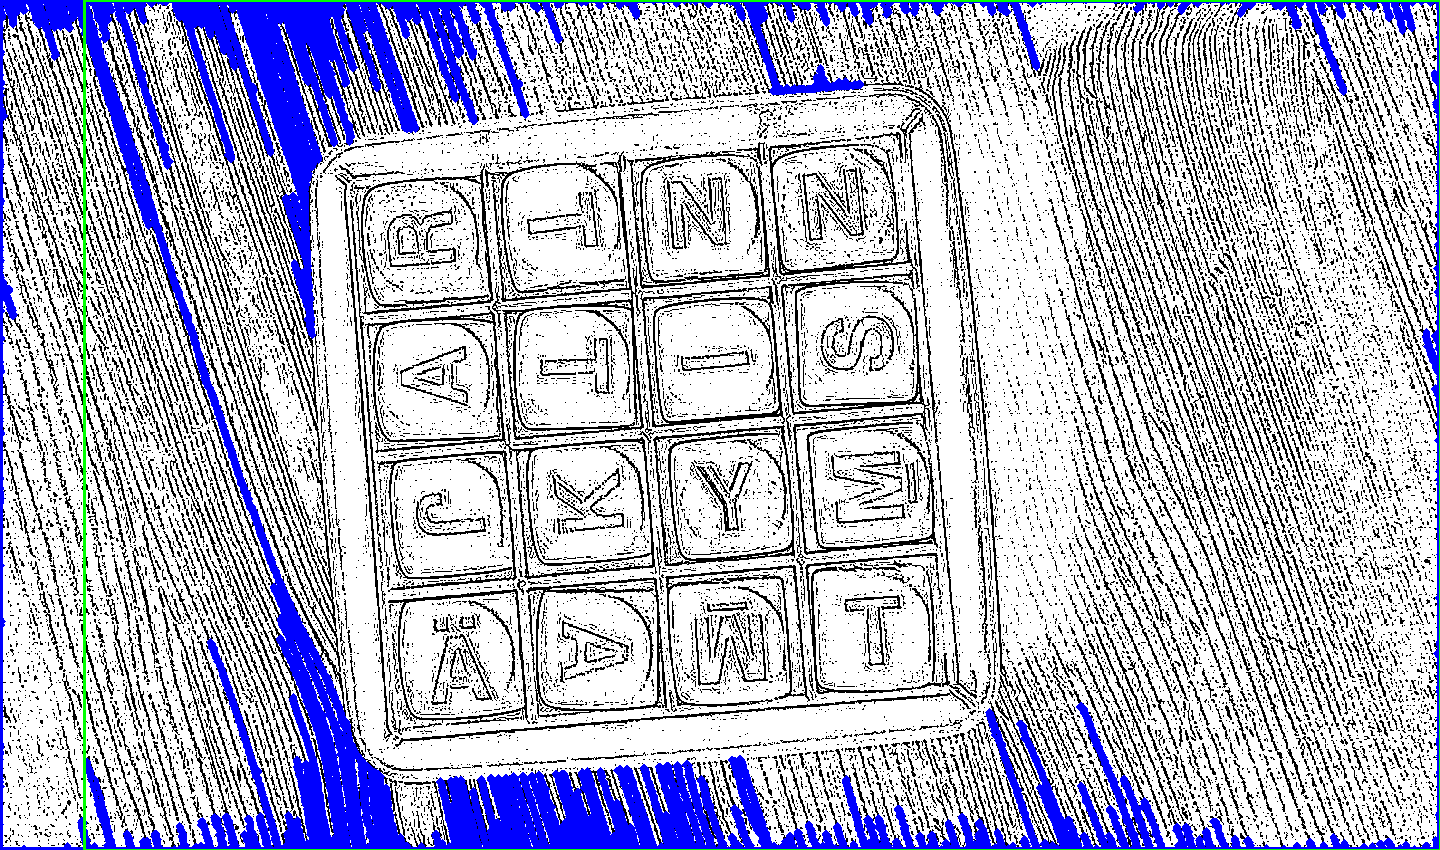

In [23]:
contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  
print("Number of Contours found = " + str(len(contours)))
if len(contours) != 0:
    img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
    # draw in blue the contours that were founded
    cv2.drawContours(img, contours, -1, 255, 3)

    # find the biggest countour (c) by the area
    c = max(contours, key = cv2.contourArea)
    x,y,w,h = cv2.boundingRect(c)

    # draw the biggest contour (c) in green
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    
plot_image(img)

In [6]:
contours

[array([[[737, 849]],
 
        [[738, 849]]], dtype=int32),
 array([[[373, 846]],
 
        [[373, 847]]], dtype=int32),
 array([[[370, 833]],
 
        [[370, 834]],
 
        [[370, 835]],
 
        [[370, 834]]], dtype=int32),
 array([[[580, 826]]], dtype=int32),
 array([[[323, 820]]], dtype=int32),
 array([[[104, 818]],
 
        [[104, 819]],
 
        [[104, 820]],
 
        [[104, 819]]], dtype=int32),
 array([[[102, 816]],
 
        [[103, 816]]], dtype=int32),
 array([[[101, 809]],
 
        [[101, 810]],
 
        [[101, 811]],
 
        [[101, 812]],
 
        [[101, 813]],
 
        [[102, 814]],
 
        [[102, 813]],
 
        [[102, 812]],
 
        [[101, 811]],
 
        [[101, 810]]], dtype=int32),
 array([[[372, 773]],
 
        [[373, 774]],
 
        [[373, 775]],
 
        [[373, 776]],
 
        [[373, 777]],
 
        [[373, 778]],
 
        [[373, 779]],
 
        [[373, 780]],
 
        [[373, 781]],
 
        [[373, 782]],
 
        [[373, 783]],
 
        

In [93]:

# load the example image and convert it to grayscale
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# check to see if we should apply thresholding to preprocess the
# image
if threshold:
    gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

# write the grayscale image to disk as a temporary file so we can
# apply OCR to it
filename = "{}.png".format(os.getpid())
cv2.imwrite(filename, gray)

# load the image as a PIL/Pillow image, apply OCR, and then delete
# the temporary file
text = pytesseract.image_to_string(Image.open(filename), config='--psm 11 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYA')
print(text)

UINEBLI

B



In [34]:
print(text)

In [6]:
text

' \n\x0c'

In [5]:
# Load image, grayscale, Otsu's threshold
image = cv2.imread(image_path)
original = image.copy()
mask = np.zeros(image.shape, dtype=np.uint8) 
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Find contours and filter using aspect ratio and area
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    area = cv2.contourArea(c)
    x,y,w,h = cv2.boundingRect(c)
    ar = w / float(h)
    if area > 1000 and ar > .85 and ar < 1.2:
        print('rect')
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.rectangle(mask, (x, y), (x + w, y + h), (255,255,255), -1)
        ROI = original[y:y+h, x:x+w]

# Bitwise-and to isolate characters 
result = cv2.bitwise_and(original, mask)
result[mask==0] = 255

# OCR
data = pytesseract.image_to_string(result, lang='eng',config='--psm 11 --oem 3 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYA')
print(data)

cv2.startWindowThread()
cv2.imshow('image', image)
cv2.imshow('thresh', thresh)
cv2.imshow('result', result)
cv2.waitKey()

rect
THAJC

LLS

UINIBLI

BLOIGAD



115

In [4]:
cnts

[array([[[374, 410]],
 
        [[379, 410]]], dtype=int32),
 array([[[333, 410]],
 
        [[335, 410]]], dtype=int32),
 array([[[424, 409]],
 
        [[424, 410]],
 
        [[435, 410]],
 
        [[433, 410]],
 
        [[432, 409]],
 
        [[431, 409]],
 
        [[430, 410]],
 
        [[429, 409]],
 
        [[428, 410]],
 
        [[426, 410]],
 
        [[425, 409]]], dtype=int32),
 array([[[407, 408]],
 
        [[407, 409]],
 
        [[406, 410]],
 
        [[412, 410]],
 
        [[412, 409]],
 
        [[408, 409]]], dtype=int32),
 array([[[368, 408]],
 
        [[366, 410]],
 
        [[361, 410]],
 
        [[370, 410]],
 
        [[369, 409]],
 
        [[370, 408]]], dtype=int32),
 array([[[446, 407]],
 
        [[445, 408]],
 
        [[443, 408]],
 
        [[442, 409]],
 
        [[438, 409]],
 
        [[438, 410]],
 
        [[449, 410]],
 
        [[448, 410]],
 
        [[447, 409]],
 
        [[447, 408]]], dtype=int32),
 array([[[415, 407]],
 
        [[